In [28]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("new_data.csv")

In [6]:
df

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2
...,...,...,...,...,...,...,...,...,...,...
9999995,9999995,2019-11-07 05:08:21 UTC,view,1005115,2053013555631882655,electronics.smartphone,apple,915.69,517800555,c6b764e0-561c-4c17-a546-2e922196bb49
9999996,9999996,2019-11-07 05:08:21 UTC,view,12707281,2053013553559896355,NaN,gislaved,90.86,539095445,b1673b33-d0ff-4a09-bf57-56dedc3d016e
9999997,9999997,2019-11-07 05:08:21 UTC,view,3601405,2053013563810775923,appliances.kitchen.washer,beko,180.16,548916637,e020a307-551c-4e58-a787-126701d30d41
9999998,9999998,2019-11-07 05:08:21 UTC,view,12711053,2053013553559896355,NaN,tunga,32.69,521586999,c8c48941-2ca1-4ce4-8d44-c96eb5df4fb5


In [14]:
df.groupby("event_time")["event_type"].count()

event_time
2019-11-01 00:00:00 UTC     2
2019-11-01 00:00:01 UTC     5
2019-11-01 00:00:02 UTC     3
2019-11-01 00:00:03 UTC     3
2019-11-01 00:00:04 UTC     1
                           ..
2019-11-07 05:08:17 UTC    21
2019-11-07 05:08:18 UTC    22
2019-11-07 05:08:19 UTC    21
2019-11-07 05:08:20 UTC    13
2019-11-07 05:08:21 UTC    17
Name: event_type, Length: 523423, dtype: int64

In [16]:
df.dtypes

Unnamed: 0         int64
event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

In [19]:
df['time'] = pd.to_datetime(df['event_time'])
df['dates'] = df['time'].dt.date
df['hour'] = df['time'].dt.hour

In [29]:
df2 = df.groupby("hour")["event_type"].count()
df3 = df2.sort_values(ascending=False)
df3

hour
17    687053
16    665704
15    651845
14    627998
13    566220
18    534887
6     523783
10    522258
7     513770
9     513042
4     510997
5     510283
8     508335
11    507677
12    504820
3     409023
19    346460
2     279908
20    179369
1     134446
21    111575
0      69919
22     69439
23     51189
Name: event_type, dtype: int64

<Axes: xlabel='hour', ylabel='event_type'>

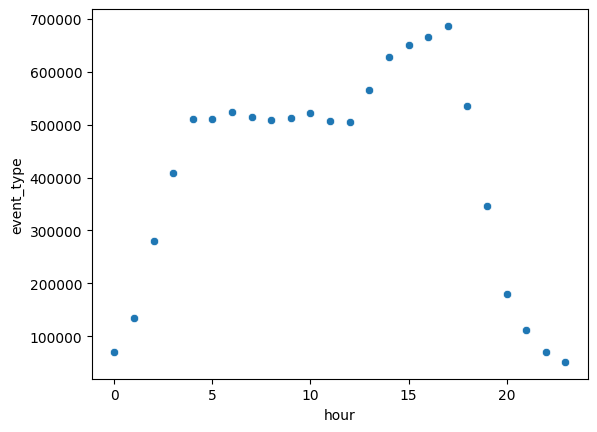

In [30]:
sns.scatterplot(df3)